# Table of Contents
 <p>

In [16]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [17]:
def lin(a,b,x): return a*x+b

In [18]:
a=3.
b=8.

In [19]:
n=30
x = random(n)
y = lin(a,b,x)

In [20]:
x

array([ 0.7369,  0.2917,  0.391 ,  0.7501,  0.5894,  0.3733,  0.3458,  0.9919,  0.6356,  0.5123,
        0.216 ,  0.2652,  0.4056,  0.8297,  0.4543,  0.0198,  0.3359,  0.3106,  0.117 ,  0.3794,
        0.2874,  0.4071,  0.5377,  0.7392,  0.8133,  0.8736,  0.573 ,  0.9339,  0.6354,  0.1956])

In [21]:
y

array([ 10.2107,   8.875 ,   9.1729,  10.2502,   9.7683,   9.12  ,   9.0373,  10.9757,   9.9068,
         9.5368,   8.6479,   8.7957,   9.2167,  10.4891,   9.3629,   8.0593,   9.0078,   8.9319,
         8.3511,   9.1383,   8.8623,   9.2212,   9.6131,  10.2177,  10.4398,  10.6209,   9.7191,
        10.8017,   9.9061,   8.5867])

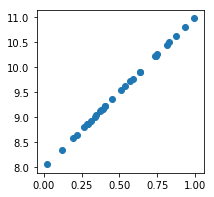

In [22]:
plt.scatter(x,y)

In [23]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [24]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0476

In [25]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [26]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [27]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani